The project: As players progress through the game they will encounter gates that force them to wait some time before they can progress or make an in-app purchase. In this project, we will analyze the result of an A/B test where the first gate in Cookie Cats was moved from level 30 to level 40. In particular, we will analyze the impact on player retention and game rounds.

INDEX
1.Import packages and data

2.Exploratory data analysis

3.A/B Test

4.Bootstrapping

In [ ]:
# First let's import the packages we will use in this project 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [4]:
#Loading the dataset
cats = pd.read_csv('cookie_cats.csv')
cats.head(20)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
6,1066,gate_30,0,False,False
7,1444,gate_40,2,False,False
8,1574,gate_40,108,True,True
9,1587,gate_40,153,True,False


1.EXPLORATORY DATA ANALYSIS:SUMMARTY STATISTICS AND CLEANING THE DATASET:<br>
-Look at summary statistics of the dataset<br>
-Clean the dataset:look for missing values, duplicated and outliers<br>
-Analyze the different statistics for the different groups<br>

In [5]:
#SUMMARY STATS
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [6]:
#missing values
cats.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [7]:
#duplicates
cats.duplicated().sum()

0

In [8]:
#How many users we have in each group(version)?
cats.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


C:\Users\manum\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='version', ylabel='count'>

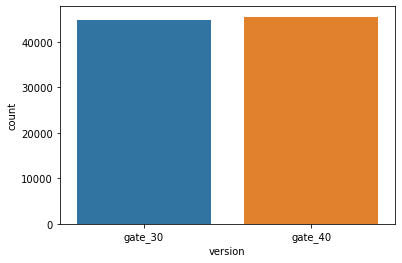

In [9]:
#Aproximately we have the same number of users for each group
#Graph representation of each group:
sns.countplot(cats.version)

We have 3 different variables to study the gate change effect: retention_1, retention_7 & sum_gamerounds. Let's look at the stats  we have for each of them

<AxesSubplot:xlabel='version', ylabel='sum_gamerounds'>

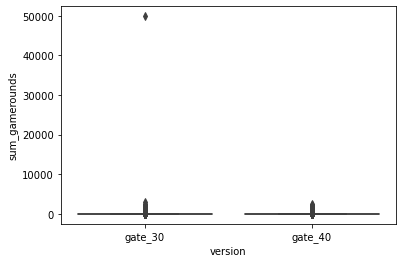

In [10]:
#Looking at the distribution of the sum of game rounds for each group:
sns.boxplot(x=cats.version, y=cats.sum_gamerounds)

We can see in the graph that we have an outlier in the gate_30 group. This player played about 50000 games during the first week. <br>
We don't know if this outlier comes from collecting badly the data or if a player actually played that amount of games. Wherever the case is, this outlier disturbs the rest of the data. Let's remove the outlier from the data.

In [12]:
#We select only game rounds that are above the maximum game rounds, that is the outlier.
cats = cats[cats.sum_gamerounds < cats.sum_gamerounds.max()]

<AxesSubplot:xlabel='version', ylabel='sum_gamerounds'>

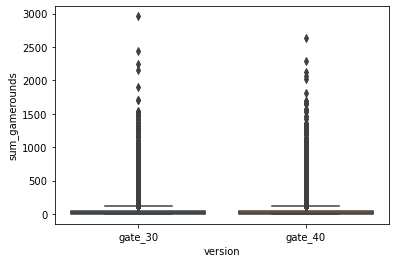

In [13]:
#Plotting after removing the outlier
sns.boxplot(x=cats.version, y=cats.sum_gamerounds)

Once we remove the outlier, we see that gamerounds move from 0 to 3000. Let's look at which are the more repeated gamerounds


In [15]:
cats.groupby('sum_gamerounds').userid.count().reset_index().head(20)


,sum_gamerounds,userid
0,0,3994
1,1,5538
2,2,4606
3,3,3958
4,4,3629
5,5,2992
6,6,2861
7,7,2379
8,8,2267
9,9,2013


We can see that most players played less than 10 sessions per week or do not even play the game. Lets plot the total distribution of gamerounds to see it clear:

<AxesSubplot:>

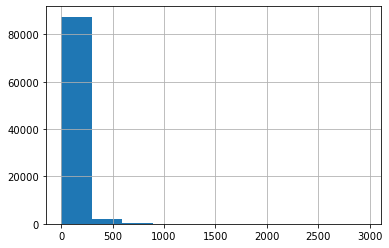

In [17]:
cats.sum_gamerounds.hist()

<AxesSubplot:xlabel='sum_gamerounds'>

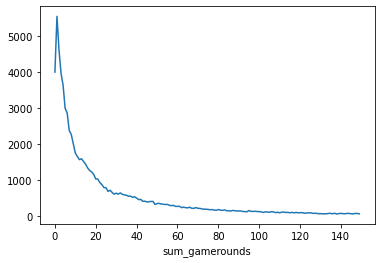

In [18]:
#A line graph can be a better representation. We are going to look at the number of players that played at leat 150 game rounds
cats.groupby('sum_gamerounds').userid.count()[:150].plot()

In [52]:
cats.groupby('version').sum_gamerounds.mean()

version
gate_30    51.342111
gate_40    51.298776
Name: sum_gamerounds, dtype: float64

Now we have a general idea of how the game rounds are distributed. The two version have nearly the same number of players assigned. 
The sum of game rounds are practically the same for each group.The data has an outlier we have removed. 
Most of the players play less than 10 game rounds per week or do not even play the game.The trend is clear:
most of the players play a small number of game rounds.


In [21]:
#Let's take a look at the retention stats for each group: Retention after 1 day of installing(retention_1) & retention after 7 days of installing(retention_7)
#Retention at day1 for each group:
cats.groupby('version').retention_1.mean()


version
gate_30    0.448198
gate_40    0.442283
Name: retention_1, dtype: float64

44% of the player base played 1 day after the game installation in both groups aproximately, with a small better retetion for gate_30

In [22]:
cats.groupby('version').retention_7.mean()

version
gate_30    0.190183
gate_40    0.182000
Name: retention_7, dtype: float64

19% of the player base played 7 days after the game installation in gate 30 & 18.2% for gate 40. It looks like we have small differences in favour of gate_30, we will lately test the significance of this differences.

In [24]:
#How many users reached level 30 and 40
cats.groupby('sum_gamerounds').userid.count().loc[[30,40]]

sum_gamerounds
30    642
40    505
Name: userid, dtype: int64

In [69]:
#More about retention, looking how much users reached day 1 and day 7
pd.DataFrame({"Retention1_Count": cats["retention_1"].value_counts(),
              "Retention7_Count": cats["retention_7"].value_counts()})

,Retention1_Count,Retention7_Count
False,50035,73408
True,40153,16780


In [73]:
#The same but in percentages:
pd.DataFrame({"Retention1_PERC": cats["retention_1"].value_counts() / len(cats),
              "Retention7_PERC": cats["retention_7"].value_counts() / len(cats)})

,Retention1_PERC,Retention7_PERC
False,0.554786,0.813944
True,0.445214,0.186056


-55 percent of the players didn't play the game 1 day after insalling

-81 percent of the players didn't play the game 7 days after insalling


As with game rounds, we see a decline in the retention of players. Aproximately just half of the players played the game 1 day after installation. Just 18% of the player base played after 1 week of installation. 

Conclusion about groups:We see small differences(we will check significance) between the two groups. Gate30 has slighter better numbers in retention and game rounds played.

2.A/B TESTING:<br>
Let's test if the small differences between each group are significant.We will test the significance for the 3 stats:Gamerounds
Retention_1 and Retention_7.<br> 
The process to run the A/B test will be the following:<br>
1.Split groups<br>
2.Check assumptions: normality(applying shapiro Test) and homogeneity(Applying Levene Test)<br>
normality: sampling distribution is normally distributed(resembles a bell shaped curve)<br>
homogeneity:standard deviations of each sample group are almost equal <br>
3.Possible outcomes:<br> 
-If data is parametric(normality ass ok) + homogeinity ->T-Test<br>
-If data parametric but not homogeneous -> Welch Test<br>
-If data non-parametric and non homogeneous ->Mann Whitney U test<br>
4.We will use bootstrapping to plot the differences 



In [29]:
#We first split the groups

group30 = cats[(cats['version'] == 'gate_30')]
group40 = cats[(cats['version'] == 'gate_40')]
group30


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
6,1066,gate_30,0,False,False
11,2101,gate_30,0,False,False
13,2179,gate_30,39,True,False
...,...,...,...,...,...
90179,9998576,gate_30,14,True,False
90180,9998623,gate_30,7,False,False
90182,9999178,gate_30,21,True,False
90183,9999349,gate_30,10,False,False


In [30]:
#TTEST FOR GAME ROUNDS:
#Import librares
from scipy.stats import shapiro
import scipy.stats as stats


We now apply saphiro to check normality for each froup. 

H0 : Distributoin is normal -> False
    
H1 : Distribution is not normal -> True

In [31]:
stats.shapiro(group30['sum_gamerounds'])

C:\Users\manum\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.48864424228668213, pvalue=0.0)

In [32]:
stats.shapiro(group40['sum_gamerounds'])


ShapiroResult(statistic=0.4825654625892639, pvalue=0.0)

For both groups, the p-value of the Saphiro test is smaller than the threshold(0.05). We reject the null hypthosis, meaning
the variables violate the normality assumption. We then move to use the Mann-Whitney test:
    
H0: Group30 == Group40 - False
    
H1: Group30 != Group40 - True

In [33]:
ttest = stats.mannwhitneyu(group30['sum_gamerounds'], group40['sum_gamerounds'])[1]
ttest

0.05089155279145376

We have a p-value higher than the threshold(0.05), meaning we can't reject the null hypothesis, so Gate30 and Gate 40 are not significantly different when looking at game rounds.


In [35]:
#TTEST for retention_1
stats.shapiro(group30['retention_1'])

ShapiroResult(statistic=0.6324949264526367, pvalue=0.0)

In [36]:
stats.shapiro(group40['retention_1'])

ShapiroResult(statistic=0.6315157413482666, pvalue=0.0)

Both p-values are smaller than the threshold, we reject the null hypthesis, the data is not normally distributed we use the Mann-Whitney test:

In [37]:

ttest = stats.mannwhitneyu(group30['retention_1'], group40['retention_1'])
ttest

MannwhitneyuResult(statistic=1022670128.0, pvalue=0.073922385401239)

We have a p-value higher than the threshold(0.05), meaning we can't reject the null hypothesis, so Gate30 and Gate 40 are not significantly different when looking at retention after 1 day of installation.

In [39]:
#TTEST for retention_7:
stats.shapiro(group30['retention_7'])

ShapiroResult(statistic=0.4787290692329407, pvalue=0.0)

In [40]:
stats.shapiro(group40['retention_7'])

ShapiroResult(statistic=0.4689866900444031, pvalue=0.0)

Both p-values are smaller than the threshold, we reject the null hypthesis, the data is not normally distributed we use the Mann-Whitney test:

In [41]:

ttest = stats.mannwhitneyu(group30['retention_7'], group40['retention_7'])
ttest

MannwhitneyuResult(statistic=1024975889.5, pvalue=0.0015918697815176374)

We have a p-value smaller than the threshold(0.05), so we reject the null hypothesis meaning that Gate30 & Gate40 are significantly different.


In conclusion, there are no significant differences between the two groups when looking at total rounds played and retention after 1 day of installation. But, when looking at retention on day 7, we see that gate30 is slightly better than gate 40, and this difference is significant. For this reason, it is a better option to keep the current gate at level 30 and not move it to level 40.


3.BOOTSTRAPPING <br>
Let's use boostrapping(re-sample the dataset n number of times) to understand how big the differences between each group for each variable are. I will first plot the mean of the two groups and then the difference between means. 

<AxesSubplot:ylabel='Density'>

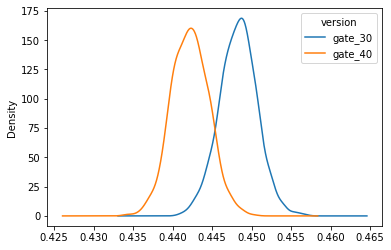

In [44]:
boot_day1 = []
for i in range(1000):
    boot_mean = cats.sample(frac = 1,replace = True).groupby('version')['retention_1'].mean()
    boot_day1.append(boot_mean)
    

boot_day1 = pd.DataFrame(boot_day1)
    
boot_day1.plot(kind='density')

Probability that 1-day retention is greater when the gate is at level 30: 0.967


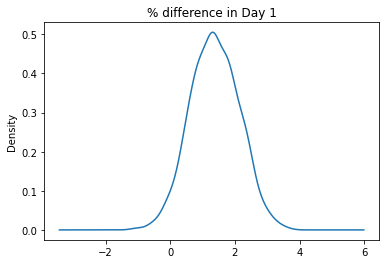

In [46]:
# Adding a column with the % difference between the two AB-groups
boot_day1['diff'] = (boot_day1.gate_30 - boot_day1.gate_40)/boot_day1.gate_40*100


ax = boot_day1['diff'].plot(kind='density')
ax.set_title('% difference in Day 1')


print('Probability that 1-day retention is greater when the gate is at level 30:',(boot_day1['diff'] > 0).mean())

<AxesSubplot:ylabel='Density'>

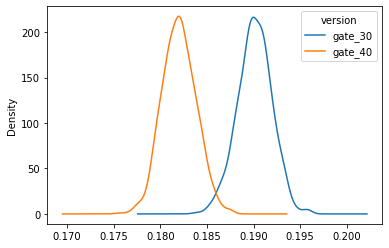

In [47]:
boot_day7 = []
for i in range(1000):
    boot_mean = cats.sample(frac = 1,replace = True).groupby('version')['retention_7'].mean()
    boot_day7.append(boot_mean)
    

boot_day7 = pd.DataFrame(boot_day7)
    

boot_day7.plot(kind='density')

Probability that 7-day retention is greater when the gate is at level 30: 0.999


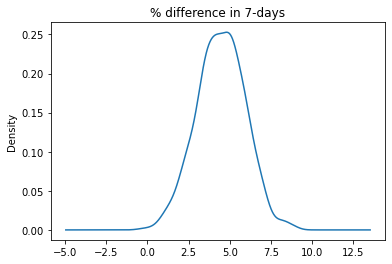

In [48]:

boot_day7['diff'] = (boot_day7.gate_30 - boot_day7.gate_40)/boot_day7.gate_40*100


ax = boot_day7['diff'].plot(kind='density')
ax.set_title('% difference in 7-days')


print('Probability that 7-day retention is greater when the gate is at level 30:',(boot_day7['diff'] > 0).mean())

<AxesSubplot:ylabel='Density'>

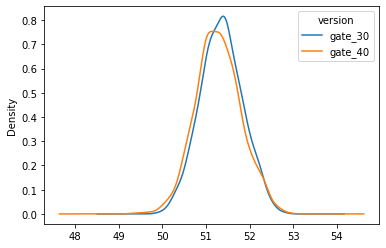

In [50]:
boot_GR = []
for i in range(1000):
    boot_mean = cats.sample(frac = 1,replace = True).groupby('version')['sum_gamerounds'].mean()
    boot_GR.append(boot_mean)
    

boot_GR = pd.DataFrame(boot_GR)
    
boot_GR.plot(kind='density')

Probability that Game Rounds is greater when the gate is at level 30: 0.546


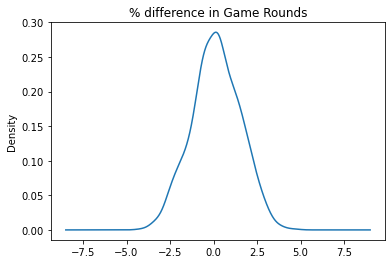

In [51]:
# Adding a column with the % difference between the two AB-groups
boot_GR['diff'] = (boot_GR.gate_30 - boot_GR.gate_40)/boot_GR.gate_40*100


ax = boot_GR['diff'].plot(kind='density')
ax.set_title('% difference in Game Rounds')


print('Probability that Game Rounds is greater when the gate is at level 30:',(boot_GR['diff'] > 0).mean())

Conclusion: We confirm the same result we had when testing the significance of the differences. In game rounds we see the least difference.In retention after 1 day of instalation we have a bigger difference but is not significant. It is in retention after 7 days of instalation where we see the bigger difference and we have tested that this difference is significant. With all this information, we can say that keeping the gate at level 30 is the best option for the team. 